# Installation

In [ ]:
!pip install gdown  # Install if needed

In [ ]:
!gdown --id 1rYL-3LvtUVO_5vaMSniu8vFvi6RBN_ln --output data.zip
!unzip data.zip -d ./dataset  # Extract to a folder

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_957.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1113.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1675.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_2368.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1661.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1107.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_943.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_2426.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_2340.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1649.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1891.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_1885.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Residential_2354.tif  
  inflating: ./dataset/EuroSAT_MS/Residential/Resident

In [ ]:
pip install torch torchvisiona

ERROR: Could not find a version that satisfies the requirement torchvisiona (from versions: none)
ERROR: No matching distribution found for torchvisiona


In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.9 MB/s eta 0:00:00


# Milestone 1: Data Collection, Exploration, and Preprocessing

# Import

In [ ]:
import os
import torch
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import rasterio
import pickle
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms
import seaborn as sns
from osgeo import gdal

In [ ]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Data Collection




we gonna use [**EuroSAT_MS** ](https://zenodo.org/records/7711810#.ZAm3k-zMKEA)

In [ ]:
print("Current working directory:", os.getcwd())  # Check where Python is looking
print("Contents of './dataset':", os.listdir('./dataset'))  # List files in the folder

Current working directory: /content
Contents of './dataset': ['EuroSAT_MS']


In [ ]:
image_paths = []
labels = []
data_dir = "./dataset/EuroSAT_MS"

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for img_path in glob(f"{class_dir}/*.*"):
            if img_path.endswith(('.tif', '.png', '.jpg')):
                image_paths.append(img_path)
                labels.append(class_name)

In [ ]:
#Create a DataFrame to store image paths and their labels
df = pd.DataFrame({"image_path": image_paths, "label": labels})
print("Class distribution:\n", df["label"].value_counts())

Class distribution:
 label
HerbaceousVegetation    3000
AnnualCrop              3000
Forest                  3000
SeaLake                 3000
Residential             3000
River                   2500
Industrial              2500
Highway                 2500
PermanentCrop           2500
Pasture                 2000
Name: count, dtype: int64


# Exploration

class distribution

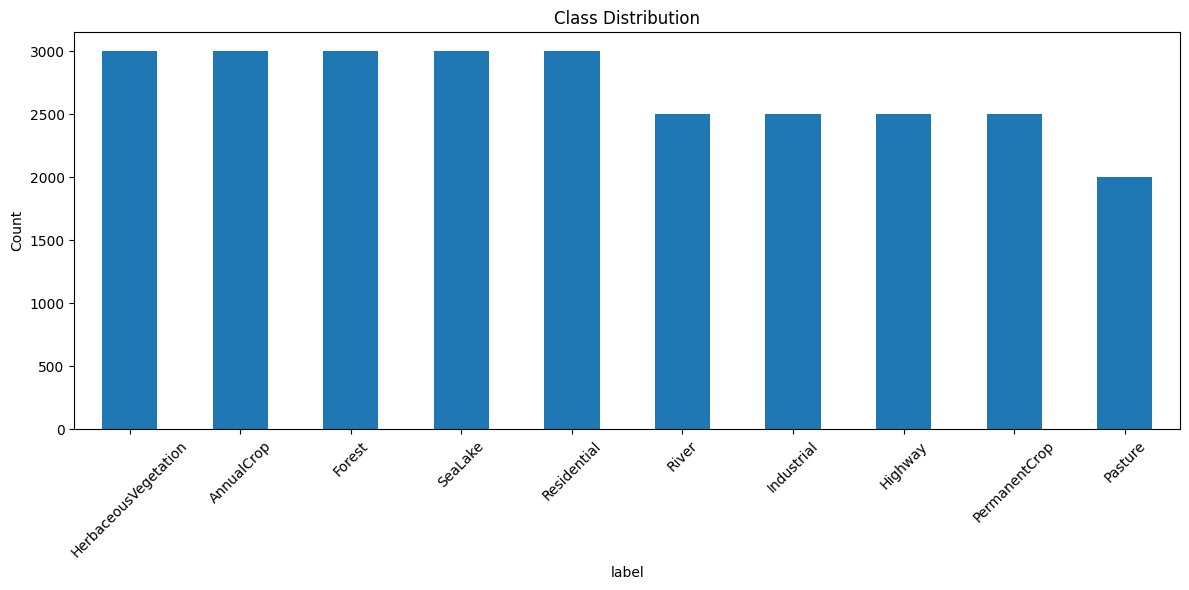

In [ ]:
plt.figure(figsize=(12, 6))
df["label"].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("class_distribution.png")  # Saves to /content/
plt.show()  # Displays in Colab

RGB Sample

In [ ]:
# ===  label mapping ===
num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)

with open("label_mapping.pkl", "wb") as f:
    pickle.dump(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))), f)

train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("\n✅ Preprocessing complete. Data ready for model training.")

Number of classes: 10

✅ Preprocessing complete. Data ready for model training.


In [ ]:
import pickle

# حمّل الـ label mapping من الملف
with open("label_mapping.pkl", "rb") as f:
    label_mapping = pickle.load(f)

# استخرج أسماء الكلاسات مرتّبة حسب الترقيم
classes = [cls for cls, idx in sorted(label_mapping.items(), key=lambda x: x[1])]

print("Classes:", classes)


Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


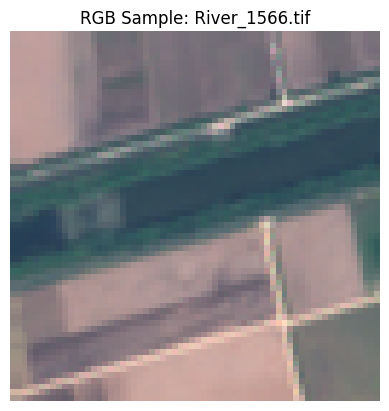

In [ ]:
# Visualize RGB composite (Bands 4,3,2)
def plot_rgb(path):
    with rasterio.open(path) as src:
        rgb = np.dstack([src.read(4), src.read(3), src.read(2)])  # (H, W, 3)
        rgb = (rgb / rgb.max() * 255).astype('uint8')
        plt.imshow(rgb)
        plt.axis('off')
        plt.title(f"RGB Sample: {os.path.basename(path)}")
        plt.show()

plot_rgb(df["image_path"].iloc[4000])  # river image

Boxplot

<ipython-input-12-77988319513d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([img[b].flatten() for b in range(13)], labels=[f"Band {b+1}" for b in range(13)])


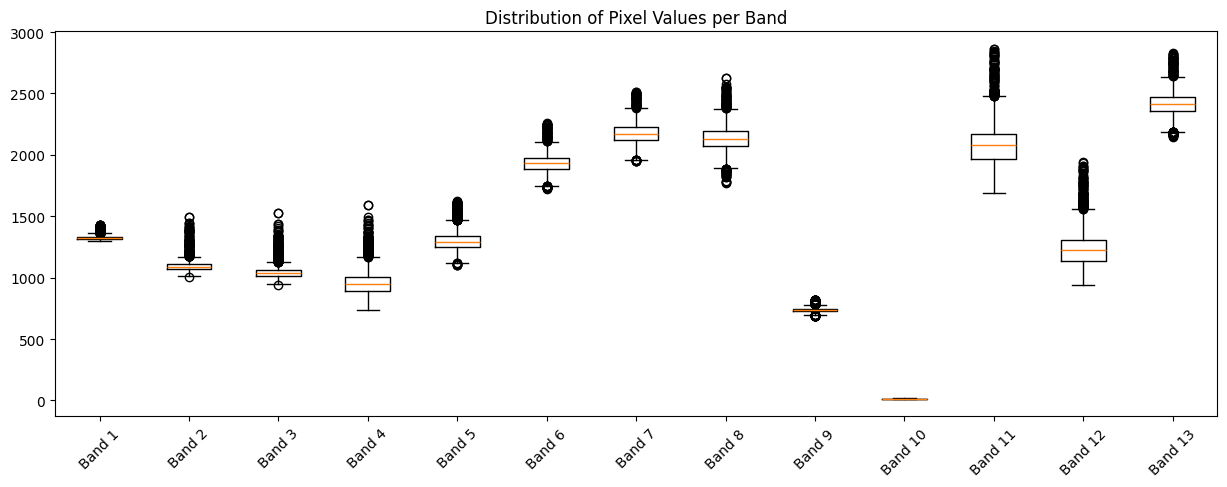

In [ ]:
# مثال لصورة عشوائية
with rasterio.open(df["image_path"][0]) as src:
    img = src.read()  # (13, 64, 64)

# رسم boxplot لكل نطاق
plt.figure(figsize=(15, 5))
plt.boxplot([img[b].flatten() for b in range(13)], labels=[f"Band {b+1}" for b in range(13)])
plt.title("Distribution of Pixel Values per Band")
plt.xticks(rotation=45)
plt.show()

because we work on classification we will not remove the outliers

Descriptive Statistics for each band

In [ ]:
sample_paths = df.sample(frac=0.1, random_state=42)["image_path"]

min_list, max_list, mean_list, std_list = [], [], [], []

for path in sample_paths:
    try:
        with rasterio.open(path) as src:
            img = src.read()  # (bands, height, width)
            min_list.append(img.min(axis=(1, 2)))
            max_list.append(img.max(axis=(1, 2)))
            mean_list.append(img.mean(axis=(1, 2)))
            std_list.append(img.std(axis=(1, 2)))
    except Exception as e:
        print(f"Error reading {path}: {e}")

# تحويل القوائم إلى numpy arrays
min_array = np.stack(min_list)
max_array = np.stack(max_list)
mean_array = np.stack(mean_list)
std_array = np.stack(std_list)

# حساب المتوسط عبر كل الصور
band_stats = pd.DataFrame({
    'min': min_array.mean(axis=0),
    'max': max_array.mean(axis=0),
    'mean': mean_array.mean(axis=0),
    'std': std_array.mean(axis=0)
}, index=[f'Band {i+1}' for i in range(min_array.shape[1])])

print(band_stats)


                 min          max         mean         std
Band 1   1241.064444  1574.193333  1359.390674   66.803346
Band 2    871.820000  2162.036296  1123.806550  155.860337
Band 3    698.682593  2211.123333  1048.631158  189.490808
Band 4    475.840741  2449.399259   952.722312  279.236187
Band 5    747.078889  2076.796296  1199.352472  228.192624
Band 6   1207.415926  3119.000000  1983.852453  353.513482
Band 7   1376.709259  3753.872593  2350.931927  452.494557
Band 8   1046.587407  4196.969259  2276.580792  526.615594
Band 9    518.890741   963.227037   717.282047   97.316399
Band 10     9.185556    14.971111    11.968320    1.158083
Band 11  1005.851111  3012.333333  1808.218682  376.413352
Band 12   518.614815  2196.600741  1115.817835  302.349295
Band 13  1480.941481  4075.802222  2572.036915  499.099509


Find the correlation

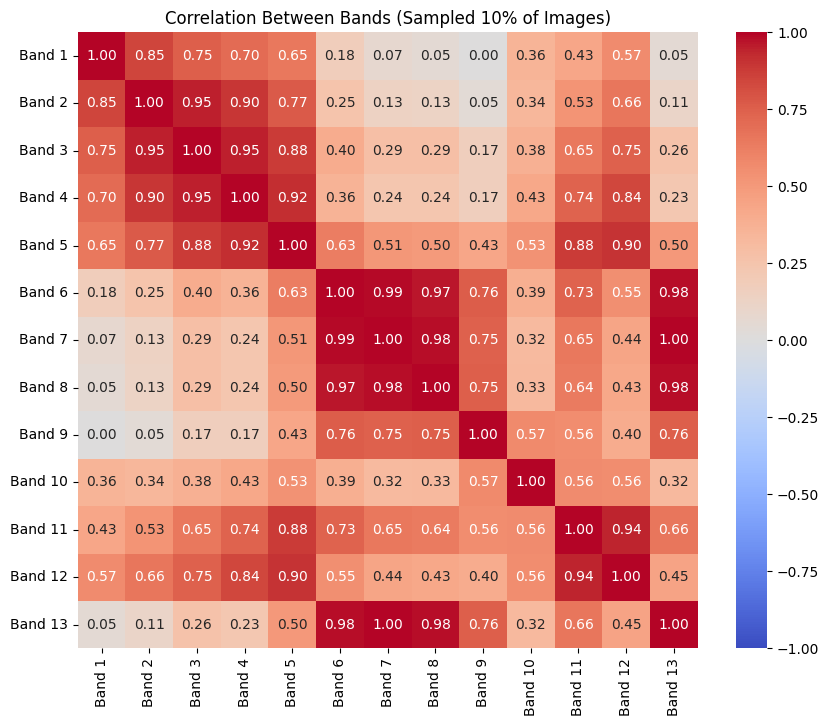

In [ ]:
# 1. Sample 10% of image paths
sample_paths = df.sample(frac=0.1, random_state=42)["image_path"]

# 2. Initialize a list to store band data from all sampled images
all_band_data = []

# 3. Process each sampled image
for path in sample_paths:
    # Open the image
    ds = gdal.Open(path)

    # Extract all bands (assuming 13 bands)
    bands = []
    for b in range(1, 14):
        band = ds.GetRasterBand(b)
        data = band.ReadAsArray()
        bands.append(data.flatten())  # Flatten to 1D array

    # Stack bands (shape: 13 x N_pixels)
    img_reshaped = np.vstack(bands).T  # Transpose to (N_pixels x 13)
    all_band_data.append(img_reshaped)

    ds = None  # Close the file

# 4. Combine all sampled pixels into one array
combined_bands = np.concatenate(all_band_data, axis=0)  # Shape: (total_pixels x 13)

# 5. Create DataFrame and compute correlations
df_bands = pd.DataFrame(combined_bands, columns=[f"Band {i+1}" for i in range(13)])

# 6. Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_bands.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Between Bands (Sampled 10% of Images)")
plt.show()

# Preprocessing

**1-Split**

In [ ]:
# === Split before ANY processing ===
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["label"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

2-**Encoding**

In [ ]:
# === Encode labels only on train set then transform others ===
label_encoder = LabelEncoder()
label_encoder.fit(train_df["label"])

train_df["label_encoded"] = label_encoder.transform(train_df["label"])
val_df["label_encoded"]   = label_encoder.transform(val_df["label"])
test_df["label_encoded"]  = label_encoder.transform(test_df["label"])

3-**Normaliation**

In [ ]:
# === Compute mean and std only from train images ===
sample_paths = random.sample(train_df["image_path"].tolist(), k=min(500, len(train_df)))
all_pixels = []

for path in sample_paths:
    with rasterio.open(path) as src:
        img = src.read().astype(np.float32) / 10000.0
        all_pixels.append(img.reshape(13, -1))

all_pixels = np.concatenate(all_pixels, axis=1)
band_means = np.mean(all_pixels, axis=1).tolist()
band_stds  = np.std(all_pixels, axis=1).tolist()

In [ ]:
def normalize_13band(image):
    return image / 10000.0

4-**Augmentation**

In [ ]:
def random_augment(image):
    if random.random() > 0.5:
        image = torch.flip(image, dims=[2])
    if random.random() > 0.5:
        image = torch.flip(image, dims=[1])
    if random.random() > 0.5:
        image = image.transpose(1, 2).flip(2)
    return image

**Data prepration**

In [ ]:
# === Custom Dataset ===
class Sentinel13BandDataset(Dataset):
    def __init__(self, df, normalize=True, augment=False):
        self.paths = df["image_path"].values
        self.labels = df["label_encoded"].values
        self.normalize = normalize
        self.augment = augment
        self.transform = transforms.Normalize(mean=band_means, std=band_stds)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        try:
            with rasterio.open(self.paths[idx]) as src:
                image = src.read().astype(np.float32)
        except Exception as e:
            print(f"Error loading image: {self.paths[idx]} - {e}")
            image = np.zeros((13, 64, 64), dtype=np.float32)

        image = np.nan_to_num(image)
        image = torch.from_numpy(image)

        if self.normalize:
            image = normalize_13band(image)
            image = self.transform(image)

        if self.augment:
            image = random_augment(image)

        return image, self.labels[idx]

In [ ]:
# === Create Dataset Instances ===
train_dataset = Sentinel13BandDataset(train_df, normalize=True, augment=True)
val_dataset   = Sentinel13BandDataset(val_df, normalize=True, augment=False)
test_dataset  = Sentinel13BandDataset(test_df, normalize=True, augment=False)

In [ ]:
# === DataLoaders ===
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)



---



# Milestone 2: Model Development and Training


🧪 FOLD 1/3


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Train Acc: 74.51% | Loss: 0.8337


Validation Accuracy: 83.94%
✅ Saved best model for Fold 1 with acc: 83.94%


Fold 1 - Epoch 2/5: 100%|██████████| 394/394 [07:21<00:00,  1.12s/it]

Train Acc: 85.75% | Loss: 0.4607


Validation Accuracy: 90.94%
✅ Saved best model for Fold 1 with acc: 90.94%


Fold 1 - Epoch 3/5: 100%|██████████| 394/394 [07:32<00:00,  1.15s/it]

Train Acc: 88.37% | Loss: 0.3817


Validation Accuracy: 88.51%


Fold 1 - Epoch 4/5: 100%|██████████| 394/394 [07:25<00:00,  1.13s/it]

Train Acc: 90.19% | Loss: 0.3120


Validation Accuracy: 93.71%
✅ Saved best model for Fold 1 with acc: 93.71%


Fold 1 - Epoch 5/5: 100%|██████████| 394/394 [07:24<00:00,  1.13s/it]

Train Acc: 91.35% | Loss: 0.2798


Validation Accuracy: 91.94%


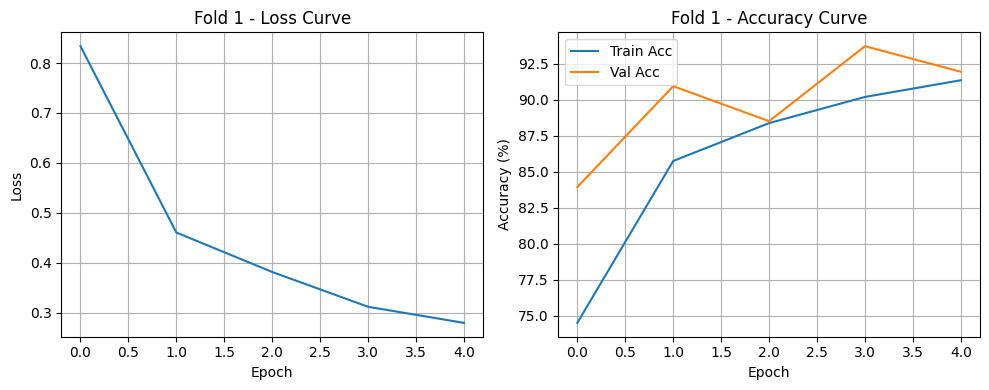


🧪 FOLD 2/3


Fold 2 - Epoch 1/5: 100%|██████████| 394/394 [07:17<00:00,  1.11s/it]

Train Acc: 73.29% | Loss: 0.8591


Validation Accuracy: 87.17%
✅ Saved best model for Fold 2 with acc: 87.17%


Fold 2 - Epoch 2/5: 100%|██████████| 394/394 [07:17<00:00,  1.11s/it]

Train Acc: 85.24% | Loss: 0.4838


Validation Accuracy: 85.95%


Fold 2 - Epoch 3/5: 100%|██████████| 394/394 [07:16<00:00,  1.11s/it]

Train Acc: 88.22% | Loss: 0.3906


Validation Accuracy: 92.17%
✅ Saved best model for Fold 2 with acc: 92.17%


Fold 2 - Epoch 4/5: 100%|██████████| 394/394 [07:31<00:00,  1.15s/it]

Train Acc: 90.40% | Loss: 0.3064


Validation Accuracy: 93.38%
✅ Saved best model for Fold 2 with acc: 93.38%


Fold 2 - Epoch 5/5: 100%|██████████| 394/394 [07:33<00:00,  1.15s/it]

Train Acc: 91.44% | Loss: 0.2715


Validation Accuracy: 94.19%
✅ Saved best model for Fold 2 with acc: 94.19%


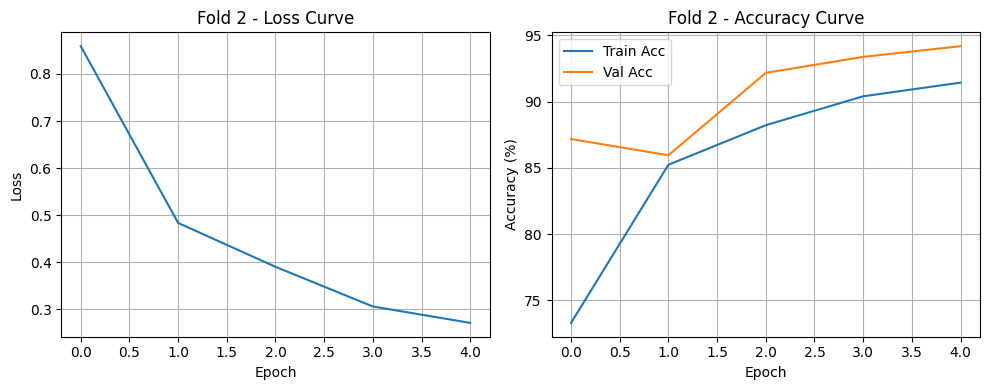


🧪 FOLD 3/3


Fold 3 - Epoch 1/5: 100%|██████████| 394/394 [07:10<00:00,  1.09s/it]

Train Acc: 76.45% | Loss: 0.7742


Validation Accuracy: 80.59%
✅ Saved best model for Fold 3 with acc: 80.59%


Fold 3 - Epoch 2/5: 100%|██████████| 394/394 [07:17<00:00,  1.11s/it]

Train Acc: 85.60% | Loss: 0.4574


Validation Accuracy: 92.44%
✅ Saved best model for Fold 3 with acc: 92.44%


Fold 3 - Epoch 3/5: 100%|██████████| 394/394 [07:31<00:00,  1.15s/it]

Train Acc: 88.73% | Loss: 0.3571


Validation Accuracy: 88.16%


Fold 3 - Epoch 4/5: 100%|██████████| 394/394 [07:55<00:00,  1.21s/it]

Train Acc: 89.97% | Loss: 0.3211


Validation Accuracy: 89.17%


Fold 3 - Epoch 5/5: 100%|██████████| 394/394 [07:49<00:00,  1.19s/it]

Train Acc: 91.64% | Loss: 0.2746


Validation Accuracy: 92.68%
✅ Saved best model for Fold 3 with acc: 92.68%


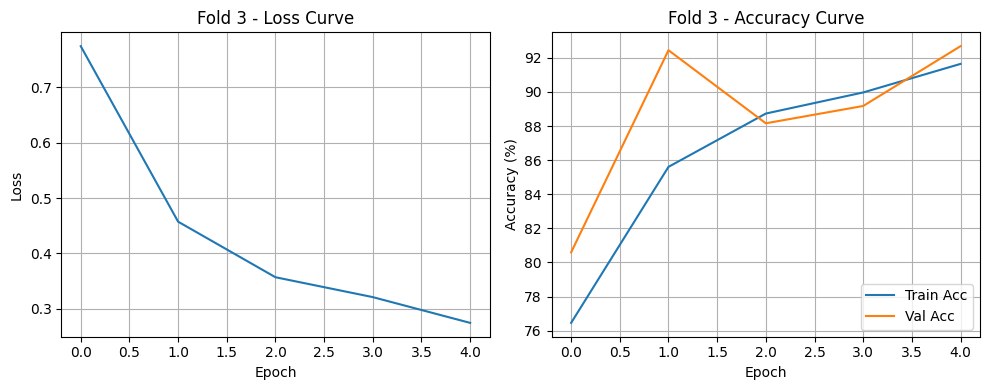


Average Cross-Validation Accuracy: 93.53%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import models

# Speed optimization
torch.backends.cudnn.benchmark = True

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# K-fold, epochs, batch size
k_folds = 3
num_epochs = 5
batch_size = 32
num_classes = len(np.unique(train_dataset.labels))  # Make sure train_dataset is already defined

# ResNet18 modified for 13 channels
class ResNetFor13Bands(nn.Module):
    def __init__(self, num_classes):
        super(ResNetFor13Bands, self).__init__()
        base_model = models.resnet18(pretrained=True)
        base_model.conv1 = nn.Conv2d(13, 64, kernel_size=7, stride=2, padding=3, bias=False)
        in_features = base_model.fc.in_features
        base_model.fc = nn.Identity()
        self.features = base_model
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(train_dataset.labels, train_dataset.labels)):
    print(f"\n🧪 FOLD {fold+1}/{k_folds}")
    print("=" * 30)

    train_subset = Subset(train_dataset, train_idx)
    val_subset = Subset(train_dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    model = ResNetFor13Bands(num_classes=num_classes).to(device, memory_format=torch.channels_last)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_val_acc = 0.0
    train_accs, val_accs, train_losses = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        correct = 0
        total = 0

        for inputs, labels in tqdm(train_loader, desc=f"Fold {fold+1} - Epoch {epoch+1}/{num_epochs}"):
            inputs = inputs.to(device, non_blocking=True).to(memory_format=torch.channels_last)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        print(f"Train Acc: {train_acc:.2f}% | Loss: {train_loss:.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        all_preds, all_labels = [], []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device, non_blocking=True).to(memory_format=torch.channels_last)
                labels = labels.to(device, non_blocking=True)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_acc = 100 * correct / total
        val_accs.append(val_acc)
        print(f"Validation Accuracy: {val_acc:.2f}%")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f"best_model_fold{fold+1}.pth")
            print(f"✅ Saved best model for Fold {fold+1} with acc: {best_val_acc:.2f}%")

    fold_accuracies.append(best_val_acc)

    # Plotting (optional)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Fold {fold+1} - Loss Curve")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Fold {fold+1} - Accuracy Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Final results
print("\n" + "=" * 40)
print(f"Average Cross-Validation Accuracy: {np.mean(fold_accuracies):.2f}%")


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Accuracy: 92.79%

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.97      0.94      0.95       450
              Forest       0.93      1.00      0.96       450
HerbaceousVegetation       0.91      0.92      0.92       450
             Highway       0.96      0.81      0.88       375
          Industrial       0.82      0.99      0.90       375
             Pasture       0.84      0.86      0.85       300
       PermanentCrop       0.89      0.90      0.90       375
         Residential       0.98      0.86      0.92       450
               River       0.96      0.98      0.97       375
             SeaLake       1.00      1.00      1.00       450

            accuracy                           0.93      4050
           macro avg       0.93      0.93      0.92      4050
        weighted avg       0.93      0.93      0.93      4050



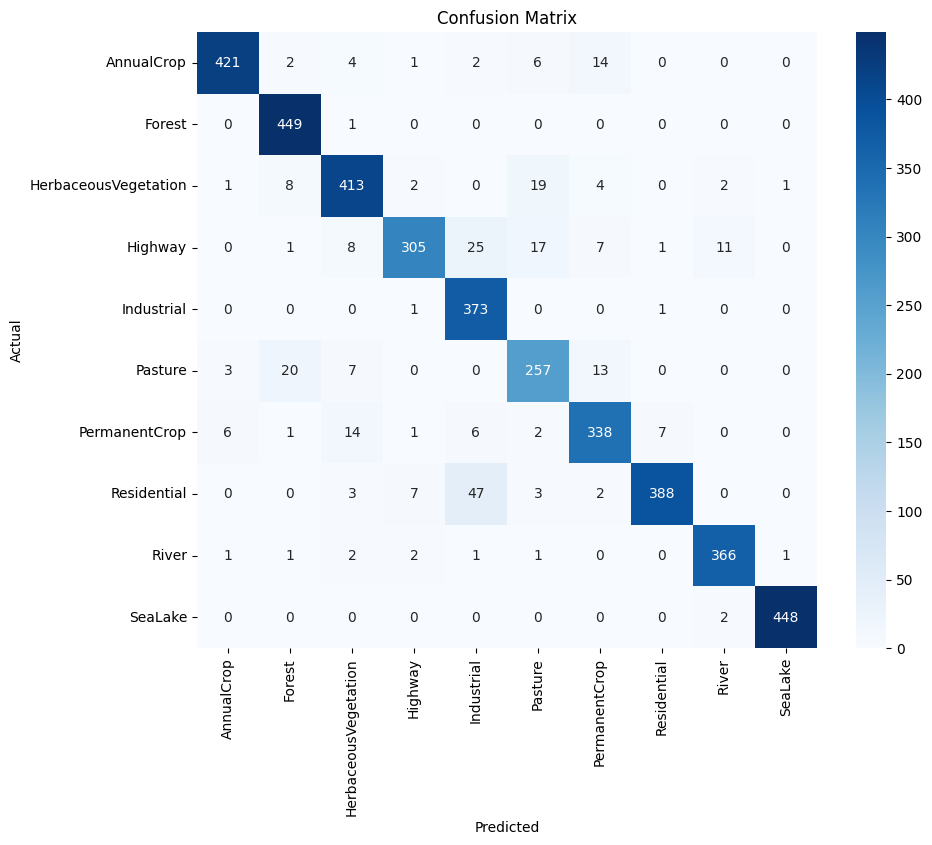

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# تأكد إن الموديل في وضع evaluation
model.eval()

all_preds = []
all_labels = []

# بدون تحديث gradients
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# تحويلهم لمصفوفة NumPy
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# 1. Accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc * 100:.2f}%")

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# 3. Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)

# 4. رسم Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




---



# Milestone 3: Model Optimization and Performance Tuning

fine tuninig for learning rate and batch size

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from itertools import product
from tqdm import tqdm

from torchvision import models  # Base ResNet

# Modified ResNet18 to accept 13 input channels and add Dropout
class ResNetFor13Bands(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5):
        super(ResNetFor13Bands, self).__init__()
        self.model = models.resnet18(pretrained=False)
        self.model.conv1 = nn.Conv2d(13, 64, kernel_size=7, stride=2, padding=3, bias=False)

        in_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 10
batch_size = 32  # Default batch size (can be updated in the loop)

# 1. Random subset of training data (30%)
subset_ratio = 0.3
subset_size = int(len(train_dataset) * subset_ratio)
subset_indices = torch.randperm(len(train_dataset))[:subset_size]
train_subset = Subset(train_dataset, subset_indices)

# Subset for validation data (30%)
val_subset_size = int(len(val_dataset) * subset_ratio)
val_subset_indices = torch.randperm(len(val_dataset))[:val_subset_size]
val_subset = Subset(val_dataset, val_subset_indices)

# 3. Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

# Hyperparameter grid
learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [16, 32]

results = []

for lr, batch_size in product(learning_rates, batch_sizes):
    print(f"\n🔧 Trying: LR={lr}, Batch Size={batch_size}")

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size)

    model = ResNetFor13Bands(num_classes=num_classes, dropout_rate=0.5).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Using ReduceLROnPlateau to monitor validation loss and adjust learning rate
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.5)

    best_val_acc = 0  # Variable to track the best validation accuracy
    best_epoch = -1  # Variable to track the epoch with the best validation accuracy

    for epoch in range(num_epochs):
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total

        # Now, calculate validation loss and accuracy
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)  # Average validation loss
        scheduler.step(val_loss)  # Adjust learning rate based on validation loss

        val_acc = 100 * val_correct / val_total

        # Track the best epoch based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch = epoch

        print(f"Epoch {epoch+1}/{num_epochs} => Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    # Collecting results
    results.append((lr, batch_size, best_epoch, best_val_acc))
    print(f"✅ Final Best Epoch: {best_epoch+1}, Best Val Acc: {best_val_acc:.2f}%")

# Print best results
results.sort(key=lambda x: x[3], reverse=True)
print("\n📊 Best Configurations:")
for res in results:
    print(f"LR={res[0]}, Batch={res[1]} -> Best Epoch={res[2]+1}, Best Val Acc: {res[3]:.2f}%")
